In [7]:
# %pip install fast_pagerank

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from fast_pagerank import pagerank_power
import igraph as ig

In [2]:
import config

In [17]:
g = nx.DiGraph()

In [18]:
l = [(0, 1), (2, 4), (394939, 29849384093)]

In [19]:
g.add_edges_from(l)

In [21]:
g.edges()

OutEdgeView([(0, 1), (2, 4), (394939, 29849384093)])

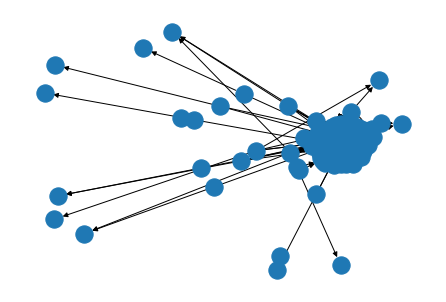

In [42]:
nx.draw(g)

In [43]:
np.array(list(nx.average_neighbor_degree(g).values())).mean()

6.190800976800976

In [44]:
g.number_of_edges()

223

In [5]:
sparse_am = nx.adjacency_matrix(g)

In [6]:
def get_circle_of_trust(network, adj_matrix, node_id, k_for_circle_of_trust=20, tol=1e-8, damping_factor=.85):
    

    personalize = np.zeros(shape=network.number_of_nodes())
    personalize[node_id] = 1
    values_of_personalized_pr = pagerank_power(adj_matrix, p=damping_factor, personalize=personalize, tol=tol)
    circle_of_trust = values_of_personalized_pr.argsort()[-k_for_circle_of_trust:][::-1]

    return circle_of_trust, values_of_personalized_pr

In [145]:
cot, vals = get_circle_of_trust(network=g, adj_matrix=sparse_am, node_id=1, k_for_circle_of_trust=5)

In [65]:
def build_hubs_and_authorities(network, circle_of_trust):
    # network = ig.Graph(directed=True)
    # network.add_vertices(config.NUM_NODES)
    assert isinstance(circle_of_trust, list)

    hub_auto_graph = nx.DiGraph()

    # add hubs
    for n in circle_of_trust:
        hub_auto_graph.add_node(n)

    # add authorities (out-edges of hubs)
    for n in circle_of_trust:
        for out_edge in network.out_edges(n):
            hub_auto_graph.add_edge(out_edge[-1], n)

    M = nx.adjacency_matrix(hub_auto_graph)
    M_prime = 

    pass
    

In [190]:
hub_auto_graph = nx.DiGraph()

# add hubs
for hub in cot:
    hub_auto_graph.add_node(str(hub)+"H")
    # hub_auto_graph.add_node(hub)

# add authorities (out-edges of hubs)
for hub in cot:
    for aut in g.neighbors(hub):
        hub_auto_graph.add_edge(str(aut)+'A', str(hub)+'H')
        # hub_auto_graph.add_edge(hub, aut)

all_nodes = [x for x in hub_auto_graph.nodes()]
hub_nodes = [int(x[:-1]) for x in all_nodes if 'H' in x]
authority_nodes = [int(x[:-1]) for x in all_nodes if 'A' in x]

M = nx.to_numpy_array(hub_auto_graph)
M_ = M[len(hub_nodes):, :][:, :len(hub_nodes)]

M_prime = np.nan_to_num(M_/M_.sum(axis=0))

M_t = M_.T
M_t = np.nan_to_num(M_t/M_t.sum(axis=0))

C:\Users\timod\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [191]:
s = np.zeros(shape=(len(hub_nodes), 1))
r = np.zeros(shape=(len(authority_nodes), 1))

node_id = 1
recommended_node_index = np.where(cot == node_id)[0][0]
s[recommended_node_index] = 1

damping_vector = np.zeros(shape=(len(hub_nodes), 1))
damping_vector[recommended_node_index] = 1

conv = False
damping_factor = 0.85
tol = 1e-3

while not conv:

    s_ = s.copy()
    r_ = r.copy()

    r_ = M_prime.dot(s)
    s_ = damping_vector + (1 - damping_factor) * (M_t.dot(r))

    marg = abs(s_-s)
    if np.linalg.norm(marg) < tol:
        conv = True
    
    s = s_
    r = r_

In [192]:
neighbors_to_not_recommend = nx.neighbors(g, node_id)
relevance_scores = r.flatten()

neighbors_to_not_recommend = set(neighbors_to_not_recommend)
results = []
for node in relevance_scores.argsort()[::-1]:
    if node not in neighbors_to_not_recommend and node != node_id:
        results.append(((node_id, node, relevance_scores[node])))
        if len(results) == 3:
            break

In [180]:
node_id

1

In [144]:
hub_auto_graph = nx.DiGraph()

# add hubs
for n in cot:
    hub_auto_graph.add_node(n)

# add authorities (out-edges of hubs)
authorities_count = 0
for n in cot:
    for out_edge in g.out_edges(n):
        hub_auto_graph.add_edge(out_edge[-1], n)
        authorities_count += 1

M = nx.to_numpy_array(hub_auto_graph)

# M_prime = M.todense()

M_prime = np.nan_to_num(M_/M_.sum(axis=0))

M_t = M_.T

s = np.zeros(shape=(len(hub_nodes), 1))
r = np.zeros(shape=(len(authority_nodes), 1))

node_id = 1
recommended_node_index = np.where(cot == node_id)[0][0]
s[recommended_node_index] = 1

damping_vector = np.zeros(shape=(len(hub_nodes), 1))
damping_vector[recommended_node_index] = 1

conv = False
damping_factor = 0.85
tol = 1e-3

while not conv:

    s_ = s.copy()
    r_ = r.copy()

    r_ = M_prime.dot(s)
    s_ = damping_vector + (1 - damping_factor) * (M_t.dot(r))

    marg = abs(s_-s)
    if np.linalg.norm(marg) < tol:
        conv = True
    
    s = s_
    r = r_

    

C:\Users\timod\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


ValueError: shapes (5,3) and (8,1) not aligned: 3 (dim 1) != 8 (dim 0)

In [137]:
bipartite_graph = nx.DiGraph()
#add nodes belonging to the circle of trust as hubs(H)
for node in cot:
    #these nodes are "hubs"(H) in the bipartite graph
    bipartite_graph.add_node(str(node)+"H")
#add out neighbors of nodes belonging to the circle of trust as authorities(A)
for node in cot:
    for out_neighbor in g.out_edges(node):
        #direction is inverted for a matter of simplicity in the sequent phases
        bipartite_graph.add_edge(str(out_neighbor[-1])+"A", str(node)+"H")
        # add_edge(str(out_neighbor)+"A", str(node)+"H")

#retrieve adjacency matrix of bipartite graph
A = nx.to_numpy_array(bipartite_graph)

#retrieve list of all nodes splitted by authority or hub
all_nodes = list(bipartite_graph.nodes())
hub_nodes = [int(x[:-1]) for x in all_nodes if 'H' in x]
authority_nodes = [int(x[:-1]) for x in all_nodes if 'A' in x]

In [141]:
g.out_edges(1)

OutMultiEdgeDataView([(1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 4), (1, 14), (1, 14), (1, 0), (1, 0), (1, 0), (1, 11)])

In [140]:
all_nodes

['1H',
 '2H',
 '0H',
 '3H',
 '39H',
 '2A',
 '1A',
 '4A',
 '14A',
 '0A',
 '11A',
 '39A',
 '3A']

In [138]:
hub_nodes

[1, 2, 0, 3, 39]

In [139]:
authority_nodes

[2, 1, 4, 14, 0, 11, 39, 3]

In [128]:
authority_nodes

[2, 1, 4, 14, 0, 11, 39, 3]

In [113]:
M = nx.to_numpy_array(hub_auto_graph)

In [114]:
M

array([[1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [118]:
len(cot)

5

In [132]:
authorities_count

5

In [130]:
M[len(hub_nodes):, :][:, :len(hub_nodes)]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [117]:
M[len(cot):, :][:, :len(cot)]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [32]:
m = M.todense()
m[:, 7]

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=int32)

In [28]:
test = [[1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1]]

In [29]:
total = 0
for i in test:
    for j in i:
        total += j

In [30]:
total

6

In [15]:
M.todense()[:, 0]

matrix([[1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1]], dtype=int32)

In [49]:
vals

array([0.18197178, 0.67412801, 0.0440776 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00226552,
       0.00226552, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00178409, 0.        , 0.00178409, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0440776 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00178409, 0.        , 0.        ,
       0.        , 0.        , 0.04586169, 0.        , 0.     

In [48]:
g.out_edges(1)

OutMultiEdgeDataView([(1, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (1, 0), (1, 55), (1, 72)])

In [56]:
nx.shortest_path(g, 1, 2)

[1, 2]

In [8]:
from data_loader import *

In [9]:
g_nx = read_pkl_graph('nx_scale_free_synthetic_10000_0208.pkl')

In [10]:
g_nx.nodes()

NodeView((8397, 2118, 6171, 2220, 5940, 4058, 5399, 3727, 2294, 2596, 3593, 2045, 6202, 7143, 3499, 1823, 6646, 6193, 7807, 7952, 8208, 839, 8978, 6884, 242, 3227, 7935, 7974, 5513, 3961, 3552, 9176, 2200, 9836, 2425, 1848, 8504, 1917, 844, 4179, 6269, 7009, 6903, 4279, 4074, 1103, 9486, 4283, 4779, 8687, 4626, 810, 4610, 7801, 6209, 8137, 1673, 6371, 1755, 7424, 7395, 3178, 9492, 6007, 8559, 3971, 740, 8965, 135, 1145, 3303, 6275, 6783, 7585, 143, 8876, 547, 4927, 3217, 8702, 5010, 4286, 7900, 4745, 3560, 9663, 8520, 9887, 9826, 9518, 8865, 3063, 8952, 702, 3636, 9939, 5129, 3947, 1018, 3089, 7295, 9532, 1402, 3778, 5774, 8402, 9156, 7225, 9543, 5562, 783, 8247, 3276, 6808, 6554, 9838, 9034, 2891, 5551, 8494, 4013, 1463, 7070, 7517, 8225, 4966, 6727, 8745, 8936, 2437, 5540, 2722, 4725, 9968, 729, 1799, 4128, 3669, 9911, 8819, 2441, 8448, 7425, 2290, 6986, 9568, 9522, 3122, 9810, 5585, 2070, 6127, 3755, 5162, 8581, 2739, 9842, 6025, 3667, 1361, 2801, 2688, 7940, 6406, 3964, 3503, 8922,

In [12]:
r = twitter_wtf(g_nx, nx.adjacency_matrix(g_nx), 8397,)

In [13]:
r

[(8397, 3, 0.10529339689875176),
 (8397, 0, 0.10200117369254351),
 (8397, 1, 0.09184798969223232),
 (8397, 2, 0.09184798969223232),
 (8397, 210, 0.01508473051479637),
 (8397, 1849, 0.01152867533161087),
 (8397, 1722, 0.011524461346148849),
 (8397, 2284, 0.010792346486280024),
 (8397, 1390, 0.010583074807525482),
 (8397, 2286, 0.010153184000311191),
 (8397, 2287, 0.010153184000311191),
 (8397, 2283, 0.010153184000311191),
 (8397, 2285, 0.010153184000311191),
 (8397, 187, 0.00862170952039924),
 (8397, 189, 0.0082837664828753),
 (8397, 188, 0.007590847996542928),
 (8397, 211, 0.004931546514485178),
 (8397, 212, 0.004931546514485178),
 (8397, 299, 0.003756238600852731),
 (8397, 297, 0.003661960685416762),
 (8397, 291, 0.0036433764766596382),
 (8397, 290, 0.003633491850039456),
 (8397, 294, 0.00324192687851382),
 (8397, 298, 0.003199587404872416),
 (8397, 296, 0.003055838982019171),
 (8397, 293, 0.003055838982019171),
 (8397, 295, 0.003055838982019171),
 (8397, 288, 0.003055838982019171),
 

In [11]:
def twitter_wtf(network, sparse_adj, node_id, k_for_circle_of_trust=20, cot_factor= 0.05, tol=1e-8,
                damping_factor=.85, k_for_recommendation=-1):
    """This method aims to realize a link prediction algorithm used by Twitter to perform
        the WTF recommendation on the platform.
        The algorithm can be seen at 'https://web.stanford.edu/~rezab/papers/wtf_overview.pdf'.
        The algorithm consists of two phases:
            1) Compute the circle of trust for the user you want to recommend(top-k nodes in PPR)
            2) Compute the top-k nodes using score propagation
    """
    k_for_circle_of_trust = int(network.number_of_nodes()*cot_factor)
    #1st phase: Compute circle of trust of user according to Personalized PageRank
    personalize = np.zeros(shape=network.number_of_nodes())
    personalize[node_id] = 1
    values_of_personalized_pr = pagerank_power(sparse_adj, p=damping_factor, personalize=personalize, tol=1e-6)
    circle_of_trust = values_of_personalized_pr.argsort()[-k_for_circle_of_trust:][::-1]

    #2nd phase: init bipartite graph
    bipartite_graph = nx.DiGraph()
    #add nodes belonging to the circle of trust as hubs(H)
    for node in circle_of_trust:
        #these nodes are "hubs"(H) in the bipartite graph
        bipartite_graph.add_node(str(node)+"H")
    #add out neighbors of nodes belonging to the circle of trust as authorities(A)
    for node in circle_of_trust:
        for out_neighbor in network.neighbors(node):
            #direction is inverted for a matter of simplicity in the sequent phases
            bipartite_graph.add_edge(str(out_neighbor)+"A", str(node)+"H")

    #retrieve adjacency matrix of bipartite graph
    A = nx.to_numpy_array(bipartite_graph)

    #retrieve list of all nodes splitted by authority or hub
    all_nodes = list(bipartite_graph.nodes())
    hub_nodes = [int(x[:-1]) for x in all_nodes if 'H' in x]
    authority_nodes = [int(x[:-1]) for x in all_nodes if 'A' in x]

    #3rd phase: start building ingredients of our SALSA algorithm
    #these are the transition matrices determined by the bipartite graph
    S_prime = A[len(hub_nodes):, :][:, :len(hub_nodes)].copy()
    R_prime = S_prime.T.copy()
    #normalize both matrices
    denominator_S_prime = S_prime.sum(axis=0)
    denominator_S_prime[denominator_S_prime == 0] = 1
    S_prime = S_prime / denominator_S_prime
    denominator_R_prime = R_prime.sum(axis=0)
    denominator_R_prime[denominator_R_prime == 0] = 1
    R_prime = R_prime / denominator_R_prime
    #these are the vectors which contain the score of similarity
    #and relevance
    s = np.zeros(shape=(len(hub_nodes), 1), dtype=np.float)
    r = np.zeros(shape=(len(authority_nodes), 1), dtype=np.float)

    #at the beginning of the procedure we put the similarity
    #of the user we want to give the recommendation equal to 1
    index_of_node_to_recommend = np.where(circle_of_trust == node_id)[0][0]
    s[index_of_node_to_recommend] = 1.

    #init damping vector
    alpha = 1 - damping_factor
    alpha_vector = np.zeros(shape=(len(hub_nodes), 1), dtype=np.float)
    alpha_vector[index_of_node_to_recommend] = alpha

    #4th phase: run the algorithm
    convergence = False
    while not convergence:
        s_ = s.copy()
        r_ = r.copy()
        r_ = S_prime.dot(s)
        s_ = alpha_vector + (1 - alpha)*(R_prime.dot(r))
        #compute difference and check if convergence has been reached
        diff = abs(s_ - s)
        if np.linalg.norm(diff) < tol:
            convergence=True
        #update real vectors
        s = s_
        r = r_

    #5th phase: order by score and delete neighbors of node to be recommended
    #of course we don't want to recommend people that the user already follow
    neighbors_to_not_recommend = nx.neighbors(network, node_id)
    relevance_scores = r.flatten()
    if k_for_recommendation == -1:
        k_for_recommendation = 0 #Take all the nodes!

    neighbors_to_not_recommend = set(neighbors_to_not_recommend)
    results = []
    for node in relevance_scores.argsort()[::-1]:
        if node not in neighbors_to_not_recommend and node != node_id:
            results.append(((node_id, node, relevance_scores[node])))
            if len(results) == k_for_recommendation:
                break
    return results